In [1]:
import numpy as np
import pandas as pd
import random
from music21 import chord, corpus, environment, meter, midi, note, stream, tempo, scale, interval, pitch


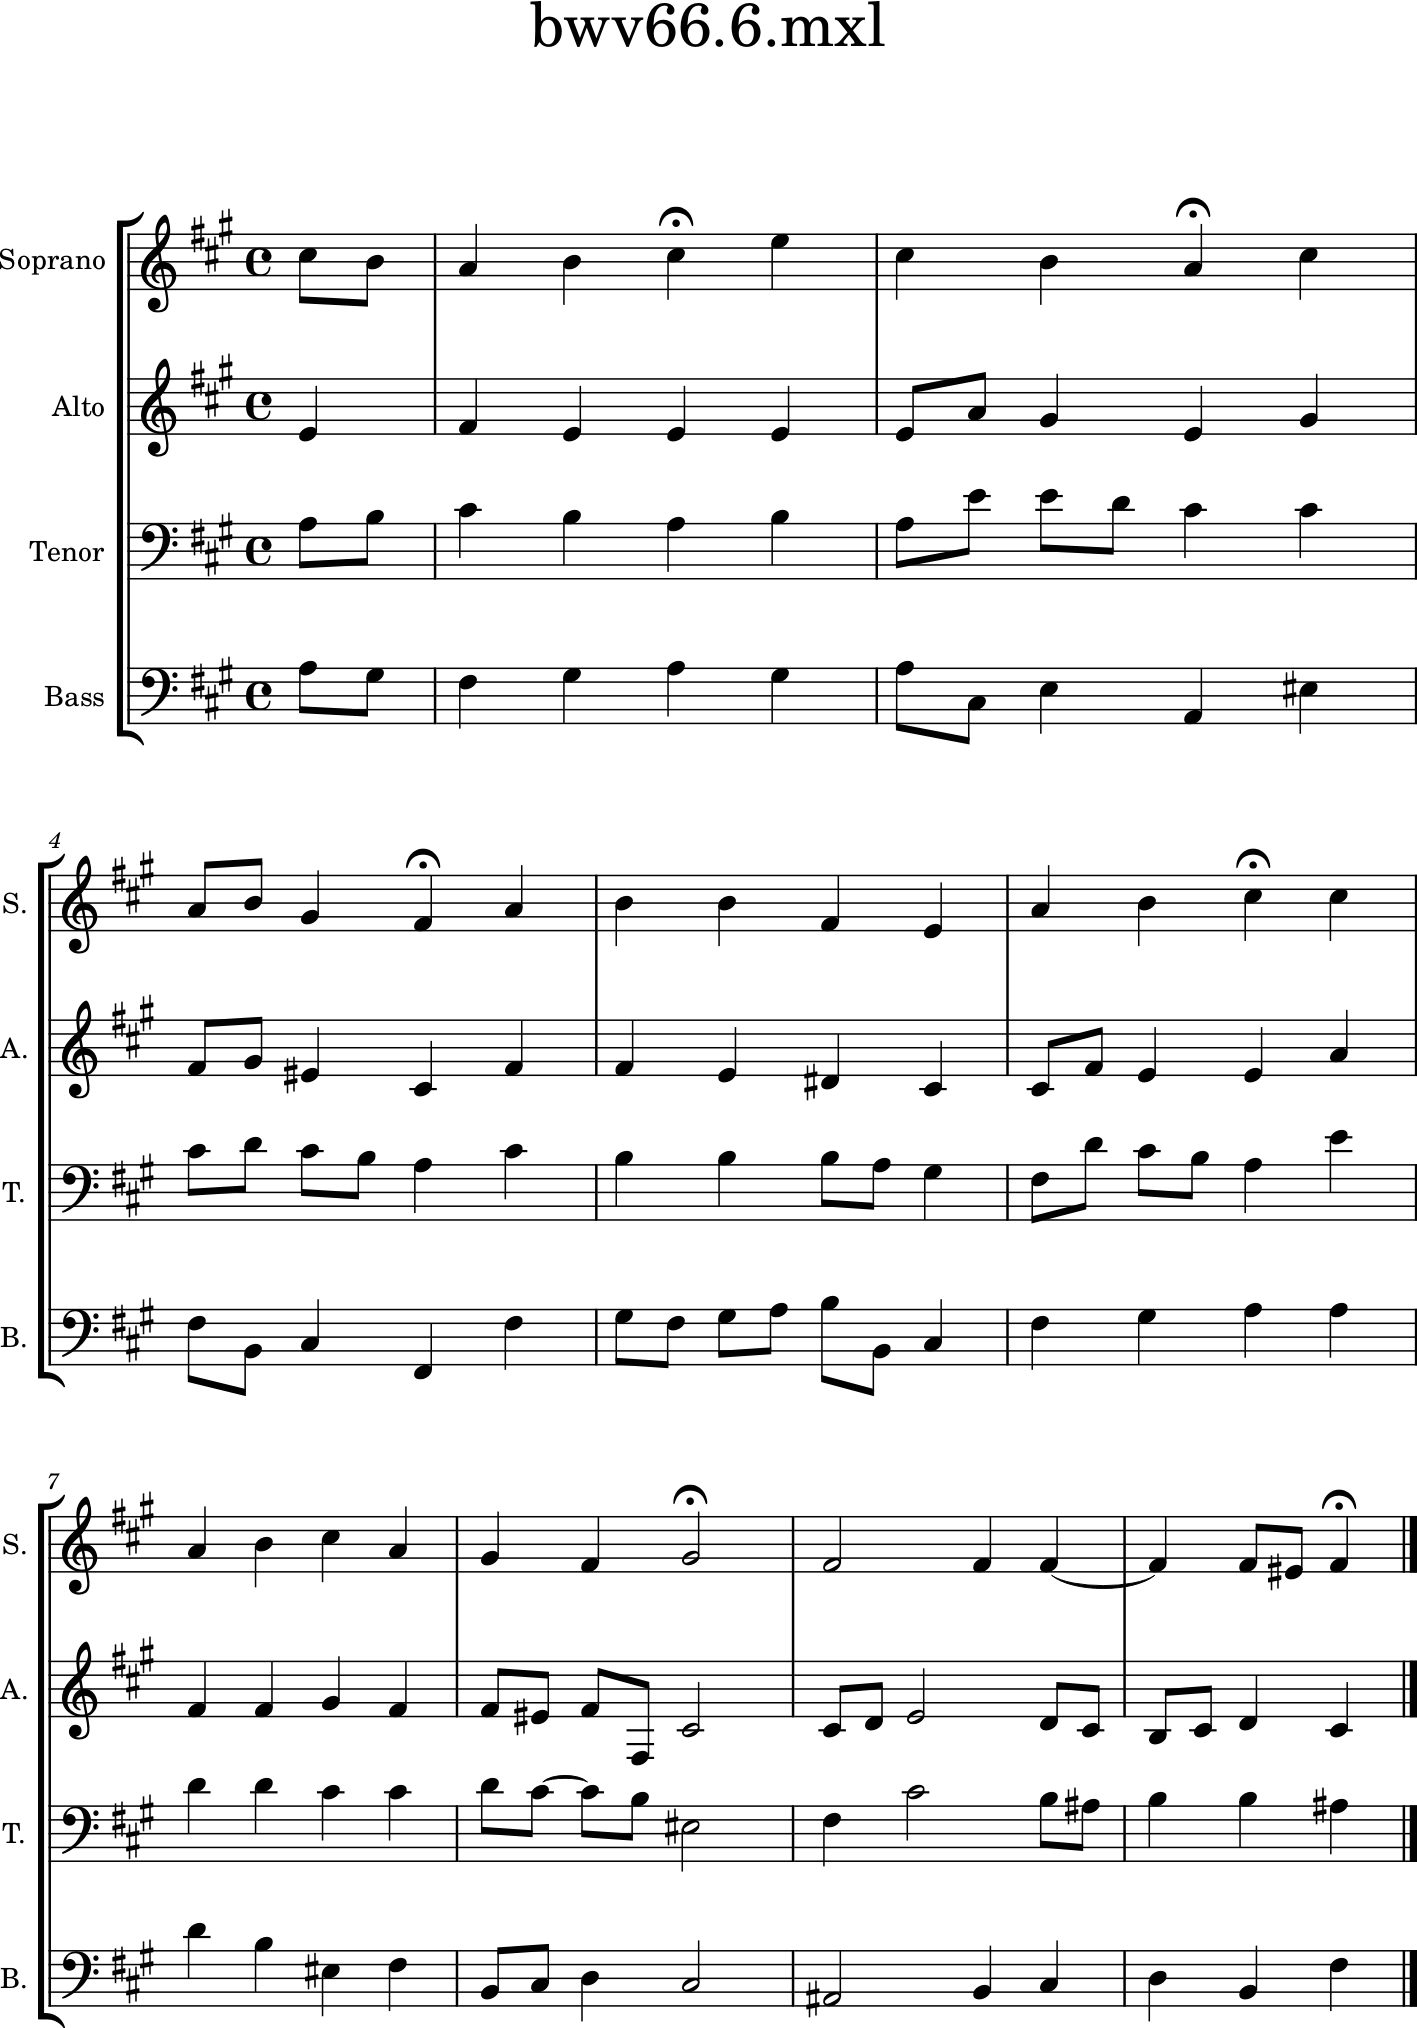

In [2]:
bach = corpus.parse('bwv66.6')
bach.show()

In [3]:
{i: e for i, e in enumerate(bach[1])}

{0: <music21.instrument.Instrument 'P1: Soprano: Instrument 1'>,
 1: <music21.stream.Measure 0 offset=0.0>,
 2: <music21.stream.Measure 1 offset=1.0>,
 3: <music21.stream.Measure 2 offset=5.0>,
 4: <music21.stream.Measure 3 offset=9.0>,
 5: <music21.stream.Measure 4 offset=13.0>,
 6: <music21.stream.Measure 5 offset=17.0>,
 7: <music21.stream.Measure 6 offset=21.0>,
 8: <music21.stream.Measure 7 offset=25.0>,
 9: <music21.stream.Measure 8 offset=29.0>,
 10: <music21.stream.Measure 9 offset=33.0>}

In [4]:
p5 = pitch.Pitch('E4', microtone=-14)
p7 = pitch.Pitch('Bb4', microtone=-31)
p9 = pitch.Pitch('D5', microtone=4)
p11 = pitch.Pitch('F#5', microtone=-49)
p13 = pitch.Pitch('A5', microtone=41)
abstractScale = scale.AbstractScale()
abstractScale.buildNetworkFromPitches([p5, p7, p9, p11, p13])
abstractScale.getIntervals()

[<music21.interval.Interval A4 (-17c)>,
 <music21.interval.Interval d4 (+35c)>,
 <music21.interval.Interval m3 (+47c)>,
 <music21.interval.Interval M3 (-10c)>,
 <music21.interval.Interval d5 (+45c)>]

In [5]:
sc = scale.ConcreteScale(pitches=[p5, p7, p9, p11, p13])

In [6]:
s = abstractScale.getRealization('E', 1, 'C3', 'C6')
s

[<music21.pitch.Pitch D3(+18c)>,
 <music21.pitch.Pitch F~3(+15c)>,
 <music21.pitch.Pitch A~3(+5c)>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch A#4(-17c)>,
 <music21.pitch.Pitch D5(+18c)>,
 <music21.pitch.Pitch F~5(+15c)>,
 <music21.pitch.Pitch A~5(+5c)>]

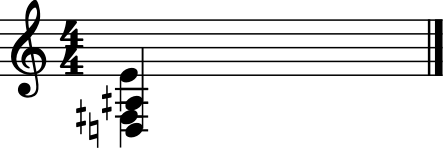

In [7]:
stream.Stream(note.Note(i) for i in s).show()

In [8]:
stream.Stream((chord.Chord(s))).write('midi', fp='harm.mid')

'harm.mid'

In [9]:
def get_stream(pitches, **kwargs):
    st = stream.Stream(**kwargs)
    for p in pitches:
        st.append(note.Note(p))
    return st

def get_measure(pitches, dur=1, **kwargs):
    st = stream.Measure(**kwargs)
    for p in pitches:
        st.append(note.Note(p, quarterLength=dur))
    return st

def get_notes(pitches):
    return [note.Note(p) for p in pitches]

def play(score):
    #Shortcut to play a stream
    midi.realtime.StreamPlayer(score).play()

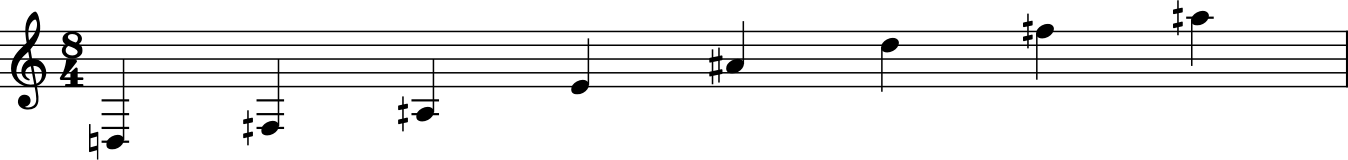

In [10]:
get_measure(s).show()

In [11]:
get_stream(s).write('midi', fp='harm.mid')

'harm.mid'

In [12]:
s

[<music21.pitch.Pitch D3(+18c)>,
 <music21.pitch.Pitch F~3(+15c)>,
 <music21.pitch.Pitch A~3(+5c)>,
 <music21.pitch.Pitch E4>,
 <music21.pitch.Pitch A#4(-17c)>,
 <music21.pitch.Pitch D5(+18c)>,
 <music21.pitch.Pitch F~5(+15c)>,
 <music21.pitch.Pitch A~5(+5c)>]

In [13]:
play(stream.Stream(note.Note(p11)))

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [14]:
pt = pitch.Pitch(frequency=450)

In [15]:
pt.microtone.cents

0

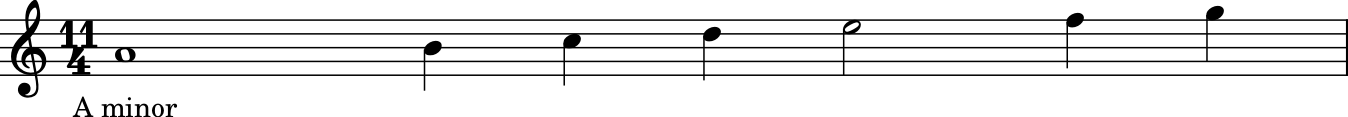

In [16]:
a = scale.MinorScale('a')
a.show()

In [17]:
a.getPitches('C5', 'F6')

[<music21.pitch.Pitch C5>,
 <music21.pitch.Pitch D5>,
 <music21.pitch.Pitch E5>,
 <music21.pitch.Pitch F5>,
 <music21.pitch.Pitch G5>,
 <music21.pitch.Pitch A5>,
 <music21.pitch.Pitch B5>,
 <music21.pitch.Pitch C6>,
 <music21.pitch.Pitch D6>,
 <music21.pitch.Pitch E6>,
 <music21.pitch.Pitch F6>]

In [18]:
tonic = a.getTonic()

In [19]:
tonic.__class__

music21.pitch.Pitch

In [20]:
a.next('A4', stepSize=5)

<music21.pitch.Pitch F5>

In [21]:
SCALE = scale.MinorScale('a')
LARGE_SKIP = 9


class pair:
    
    scale = SCALE
    
    def __init__(self, left, right=None):
        if right is None:
            right = left
        self.l, self.r = left, right
        self.apply_rule()
        
    def apply_rule(self):
        if isinstance(self.l, pitch.Pitch):
            if self.l == self.r:
                self.large_skip()
                
    def large_skip(self):
        middle = self.scale.next(self.l, stepSize=LARGE_SKIP)
        self.l = skip(self.l, middle)
        self.r = skip(middle, self.r)
                
    def pitches(self):
        if isinstance(self.l, pitch.Pitch):
            return [self.l, self.r]
        else:
            return self.l.pitches() + self.r.pitches()[1:]
        
    def __repr__(self):
        return f" [{self.l} {self.r}] "
        
         
class skip(pair):
    
    pass
           
p = pair(pitch.Pitch('A3'))
p.pitches()

[<music21.pitch.Pitch A3>, <music21.pitch.Pitch C5>, <music21.pitch.Pitch A3>]

In [22]:
p

 [ [A3 C5]   [C5 A3] ] 

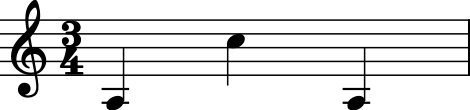

In [23]:
get_measure(p.pitches()).show()

C5 and A3 split by E4
C5 and E4 split by G4
C5 and G4 split by A4
C5 and A4 split by B4
G4 and E4 split by F4
E4 and A3 split by C4
E4 and C4 split by D4
C4 and A3 split by B3
 [ [A3 C5]   [ [ [ [ [C5 B4]   [B4 A4] ]   [A4 G4] ]   [ [G4 F4]   [F4 E4] ] ]   [ [ [E4 D4]   [D4 C4] ]   [ [C4 B3]   [B3 A3] ] ] ] ] 


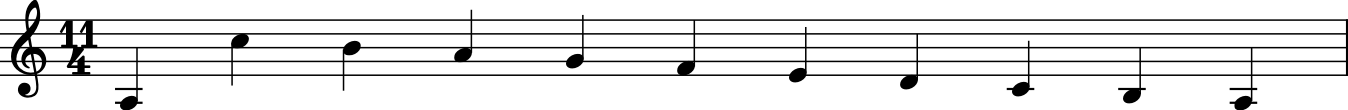

In [24]:
def get_middle(scale, start, end):
    pitches = scale.getPitches(start, end)
    middle = len(pitches) // 2
    return pitches[middle]

class skip(pair):
    
    def apply_rule(self):
        if isinstance(self.l, pitch.Pitch):
            iv = interval.Interval(self.l, self.r)
            if iv.direction == -1 and abs(iv.semitones) > 2: ## if descending and larger than a whole tone
                self.split()
                    
    def split(self):
        middle = get_middle(self.scale, self.l, self.r)
        print(f"{self.l} and {self.r} split by {middle}")
        self.l = skip(self.l, middle)
        self.r = skip(middle, self.r)
                
   
p = pair(pitch.Pitch('A3'))
print(p)
melody = get_measure(p.pitches())
melody.show()
play(melody)

C5 and A3 split by F4
F4 prepared by E4
A3 prepared by G#3
 [ [A3 C5]   [ [ [C5 E4]   [E4 F4] ]   [ [F4 G#3]   [G#3 A3] ] ] ] 


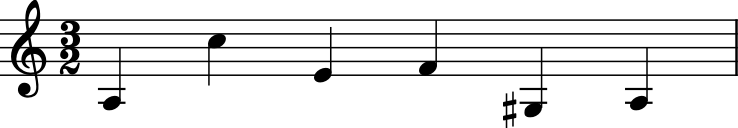

In [25]:
class skip(pair):
    
    def apply_rule(self):
        if isinstance(self.l, pitch.Pitch):
            iv = interval.Interval(self.l, self.r)
            if iv.direction == -1 and abs(iv.semitones) > 2:
                coin_toss = random.random() >= 0.2  ## is True 80 % of the time
                if coin_toss:
                    self.split()
                else:
                    self.prepare()
                    
    def split(self):
        middle = get_middle(self.scale, self.l, self.r)
        print(f"{self.l} and {self.r} split by {middle}")
        self.l = skip(self.l, middle)
        self.r = skip(middle, self.r)
        
    def prepare(self):
        leading_tone = self.r.transpose('-m2')
        print(f"{self.r} prepared by {leading_tone}")
        self.l = pair(self.l, leading_tone)
        self.r = pair(leading_tone, self.r)
                
   
p = pair(pitch.Pitch('A3'))
print(p)
melody = get_measure(p.pitches())
melody.show()
play(melody)

In [26]:
scale.OctatonicScale('C')

<music21.scale.OctatonicScale C Octatonic>

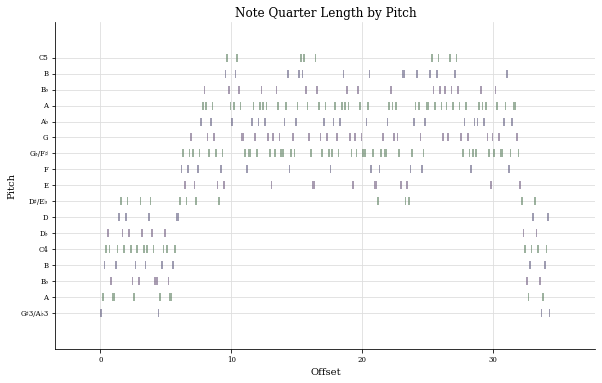

In [27]:
LOG = False
SPLIT_LARGER_THAN = 6
#SCALE_TYPE = scale.WholeToneScale
#SCALE_TYPE = scale.ChromaticScale
SCALE_TYPE = scale.OctatonicScale

def fill_iv(zig, zag):
    """ Takes two pitches and fills the interval between them with notes from
        two different scales, depending on the interval's direction.
    """
    if zig == zag:
        return [zig]
    direction2scale = {
        1: SCALE_TYPE('C'),
        -1: SCALE_TYPE('C#')
    }
    iv = interval.Interval(zig, zag)
    sc = direction2scale[iv.direction]
    return sc.getPitches(zig, zag)


def split_iv(zig, zag):
    """ Takes to pitches, calls fill_iv() and returns 3 randomly selected notes
        that are neither the first nor the last one.
    """
    pitches = fill_iv(zig, zag)
    n = len(pitches)
    splitpoint = random.randint(1, n-2)
    splits = {
        0: splitpoint,
        1: random.randint(0, splitpoint),
        2: random.randint(splitpoint, n-1)
    }
    return [pitches[splits[i]] for i in range(3)]


class zigzag:
    
    def __init__(self, zig, zag, comeback=True):
        self.zig, self.zag = zig, zag
        self.comeback = comeback
        self.iv = interval.Interval(zig, zag)
        self.zigzags = None                    ## by convention, all properties are declared in the __init__ function,
        self.pitches = None                    ## even if they are used only later
        self.apply_rule()
        
    def apply_rule(self):
        if abs(self.iv.semitones) > SPLIT_LARGER_THAN:
            self.split()
        else:
            self.fill()
                
    def split(self):
        splitpoint, spike1, spike2 = split_iv(self.zig, self.zag)
        if LOG:
            print(f"{self.zig} {self.zag} -> {self.zig} - {splitpoint} - {spike1} - {splitpoint} - {spike2} - {splitpoint} - {self.zag}")
        self.zigzags = {
            0: zigzag(self.zig, splitpoint, comeback=False),
            1: zigzag(splitpoint, spike1),
            2: zigzag(splitpoint, spike2),
            3: zigzag(splitpoint, self.zag, comeback=False)
        }
        splitpoint, spike1, spike2 = split_iv(self.zag, self.zig)
        if LOG:
            print(f"{self.zag} {self.zig} -> {self.zag} - {splitpoint} - {spike1} - {splitpoint} - {spike2} - {splitpoint} - {self.zig}")
        self.zigzags.update({
            4: zigzag(self.zag, splitpoint, comeback=False),
            5: zigzag(splitpoint, spike1),
            6: zigzag(splitpoint, spike2),
            7: zigzag(splitpoint, self.zig, comeback=False)
        })
        
    def fill(self):
        if LOG:
            print(f"Filled {self.zig}-{self.zag}{' coming back' if self.comeback else ''}")
        self.pitches = fill_iv(self.zig, self.zag)
        if self.comeback:
            self.pitches += fill_iv(self.zag, self.zig)[1:]
                    
    def get(self):
        if self.pitches is None:
            return [pitch for pitches in (zz.get() for zz in self.zigzags.values()) for pitch in pitches[:-1]] + [self.zig]
        else:
            return self.pitches
        
    def __repr__(self):
        return f"zig: {self.zig}, zag: {self.zag}"
        
         
p1 = pitch.Pitch('G#3')
p2 = pitch.Pitch('C5')
zz = zigzag(p1, p2)
melody = get_measure(zz.get(), 1/8)
melody.plot()

In [28]:
play(melody)